In [ ]:
#| default_exp gstreamer.raw


# Gstreamer raw transmit
> Gstreamer transmit raw video


In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:
#| hide
# skip_showdoc: true to avoid running cells when rendering docs, and skip_exec: true to skip this notebook when running tests. 
# this should be a raw cell 

In [ ]:
#| export
from UAV.imports import *   # TODO why is this relative import on nbdev_export?
import cv2
import gi
import numpy as np
from imutils import resize

from PIL import Image


import time
# from dataloader import LoadImages, resize
from pathlib import Path
# import logging

# gi.require_version('Gst', '1.0')


In [ ]:
#| hide
from fastcore.utils import *
from nbdev.showdoc import *
from fastcore.test import *

In [ ]:
import UAV.gstreamer.valve as g
from UAV.utils.display import *

In [ ]:
test_eq(g.ping_ip("127.0.0.1"), True)
g.logger.info("hello")
g.logger.info("hello")

19:31:33,202 DEBUG [  valve.py:292] Ping: Found 127.0.0.1
19:31:33,203  INFO [2486295059.py:  2] hello
19:31:33,204  INFO [2486295059.py:  3] hello


In [ ]:
gstcommand=['videotestsrc ! autovideosink']

In [ ]:
gstcommand=['videotestsrc ! rtpvrawpay ! udpsink host=127.0.0.1 port=5000']
gst-launch-1.0 -v filesrc location=/path/to/raw/file.yuv ! videoparse format=i420 width=640 height=480 ! rtpvrawpay ! udpsink host=127.0.0.1 port=5000


In [ ]:
a = g.GstStream('CAM-0', gstcommand)

19:36:35,334 WARNING [  valve.py:143] GstStream Error: appsink is None
19:36:35,391  INFO [  valve.py:126] GstStream started


In [ ]:
gst-launch-1.0 -v filesrc location=nbs/api/images/mnist3.png ! pngdec ! videoconvert ! rtpvrawpay ! udpsink host=127.0.0.1 port=5000



In [ ]:
im2 = np.array(Image.open(TEST_IMAGE))

20:06:40,830 DEBUG [PngImagePlugin.py:190] STREAM b'IHDR' 16 13
20:06:40,830 DEBUG [PngImagePlugin.py:190] STREAM b'IDAT' 41 182


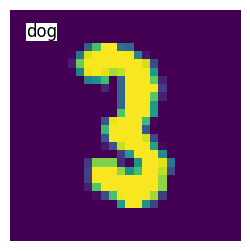

In [ ]:
im2 = np.array(Image.open(TEST_IMAGE_BW))
ax = show_image(im2, text='dog', figsize=(3,3))


In [ ]:
TEST_IMAGE_BW

'images/mnist3.png'

In [ ]:
b = a.pipeline.get_by_name('sink')
print(b)

None


In [ ]:
#| hide
# from nbdev import nbdev_export
# nbdev_export()